In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [3]:
data=df.copy()

**Show Top 5 Records**

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Shape of the dataset**

In [5]:
df.shape

(500, 9)

**Summary of the dataset**

In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


dataset -https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )

In [31]:
print("Average GRE Score :{0:.2f} out of 340".format(df['GRE Score'].mean()))
print('Average TOEFL Score:{0:.2f} out of 120'.format(df['TOEFL Score'].mean()))
print('Average CGPA:{0:.2f} out of 10'.format(df['CGPA'].mean()))
print('Average Chance of getting admitted:{0:.2f}%'.format(df['Chance of Admit '].mean()*100))

Average GRE Score :316.47 out of 340
Average TOEFL Score:107.19 out of 120
Average CGPA:8.58 out of 10
Average Chance of getting admitted:72.17%


**Check Datatypes in the dataset**

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
# all the data type are in numerical  and no null values

## Univariate Analysis

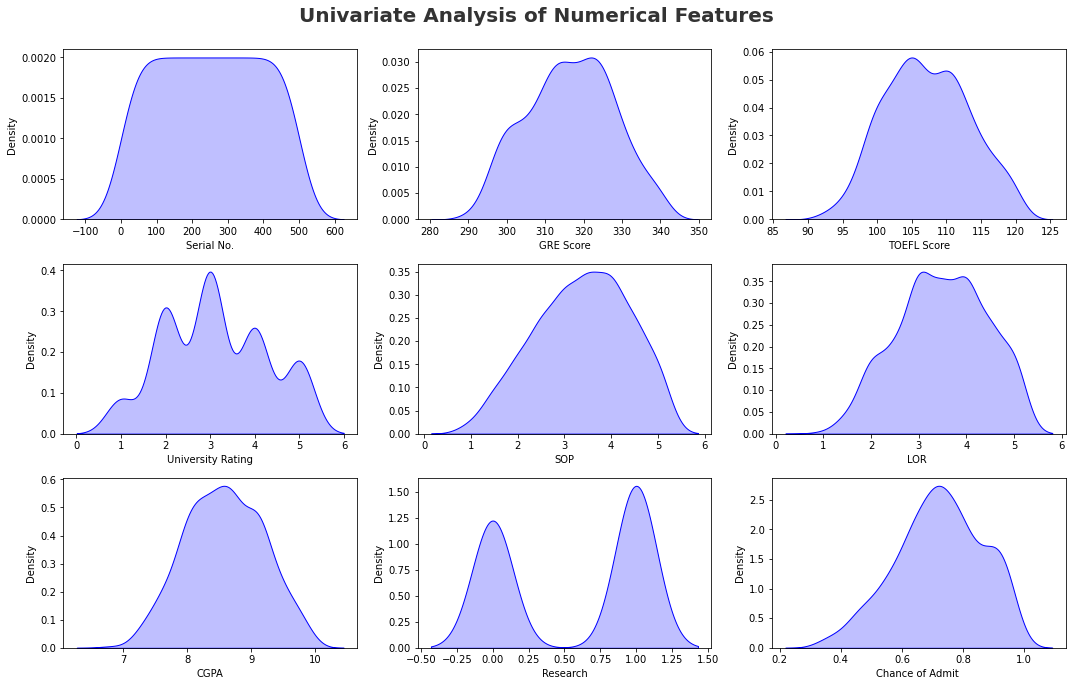

In [9]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(df.columns)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[df.columns[i]],shade=True, color='b')
    plt.xlabel(df.columns[i])
    plt.tight_layout()

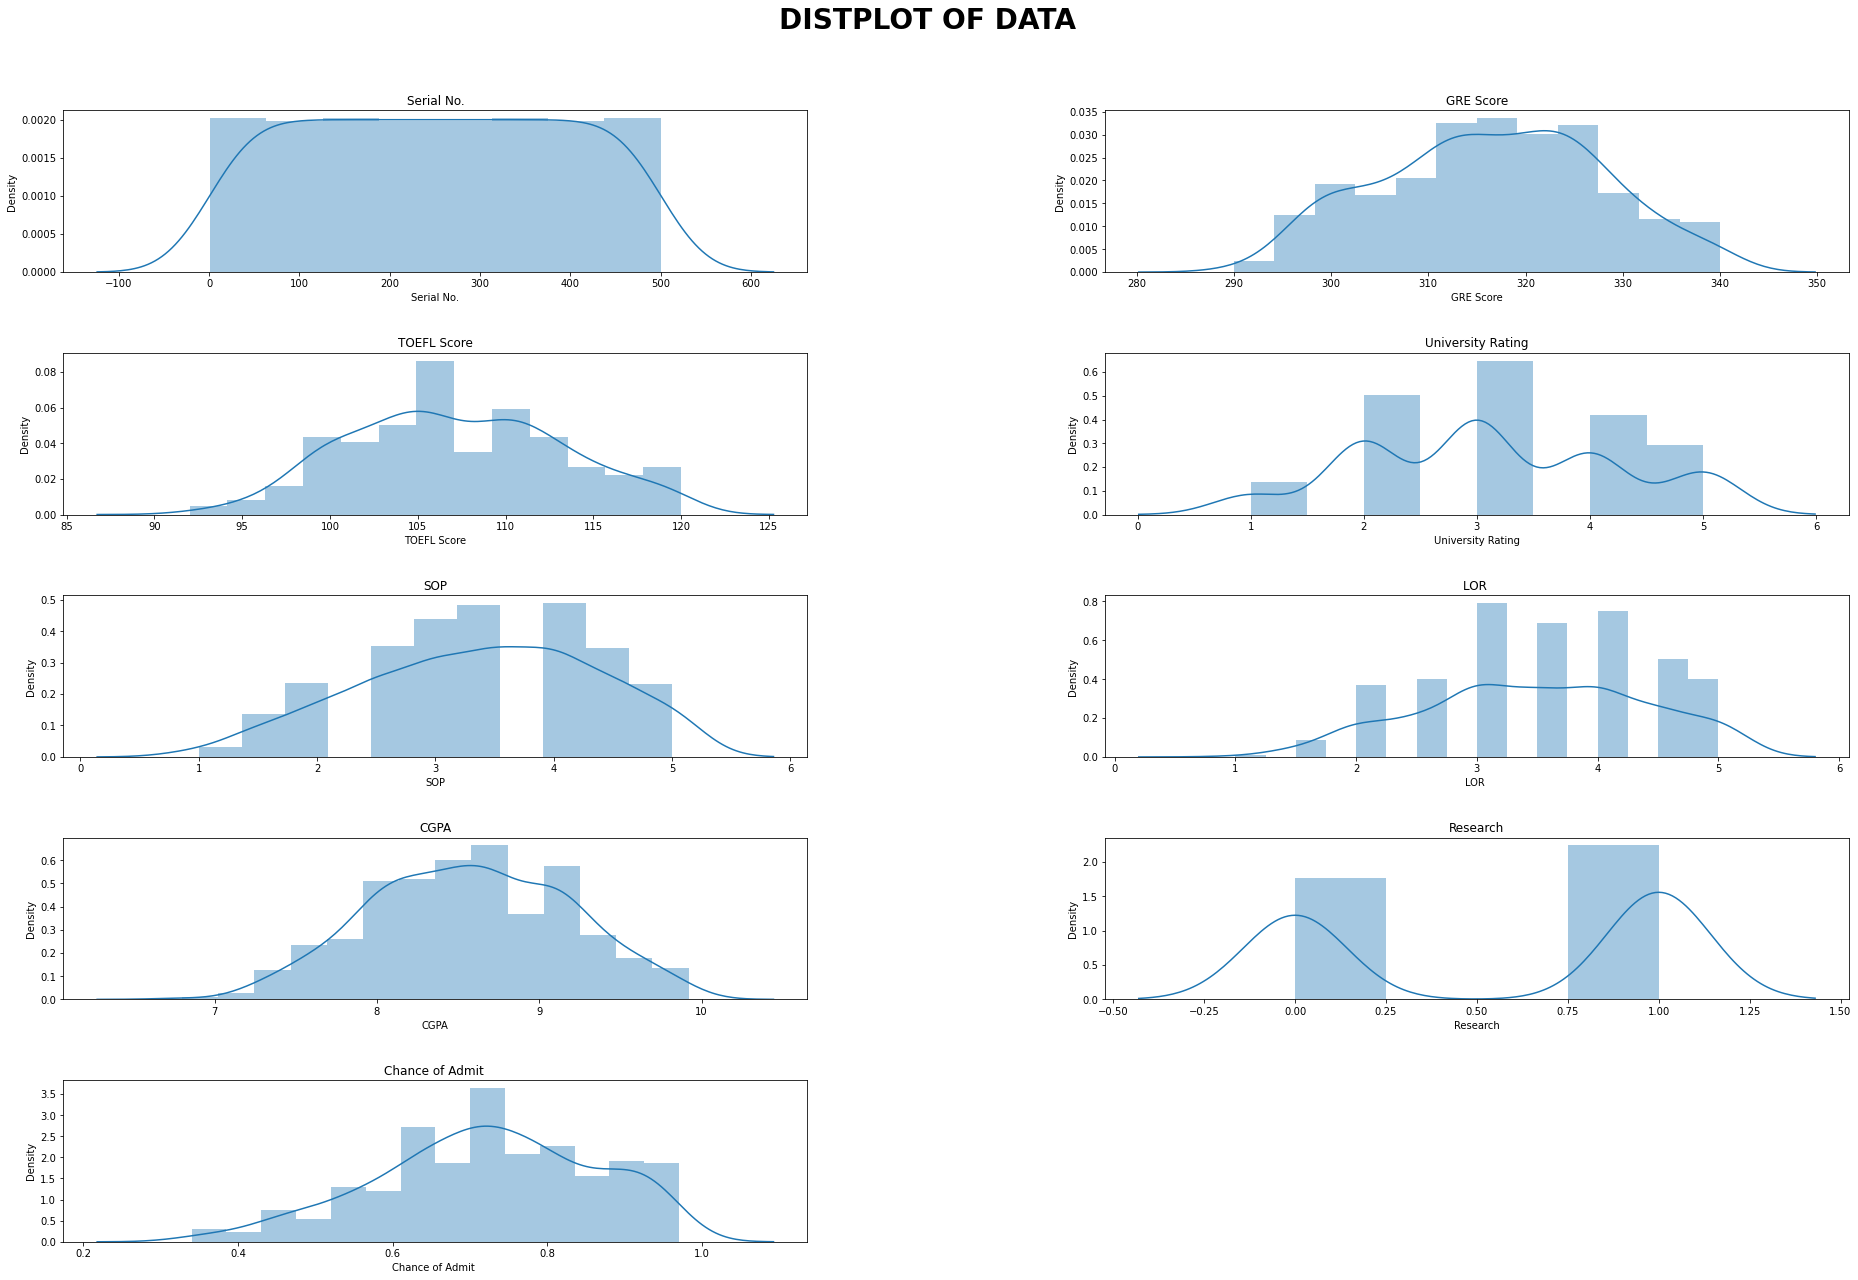

In [10]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT OF DATA', fontsize=28, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(df.columns):  
    ax1 = fig.add_subplot(6,2, i+1);
    ax1 = sns.distplot(df[col]);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

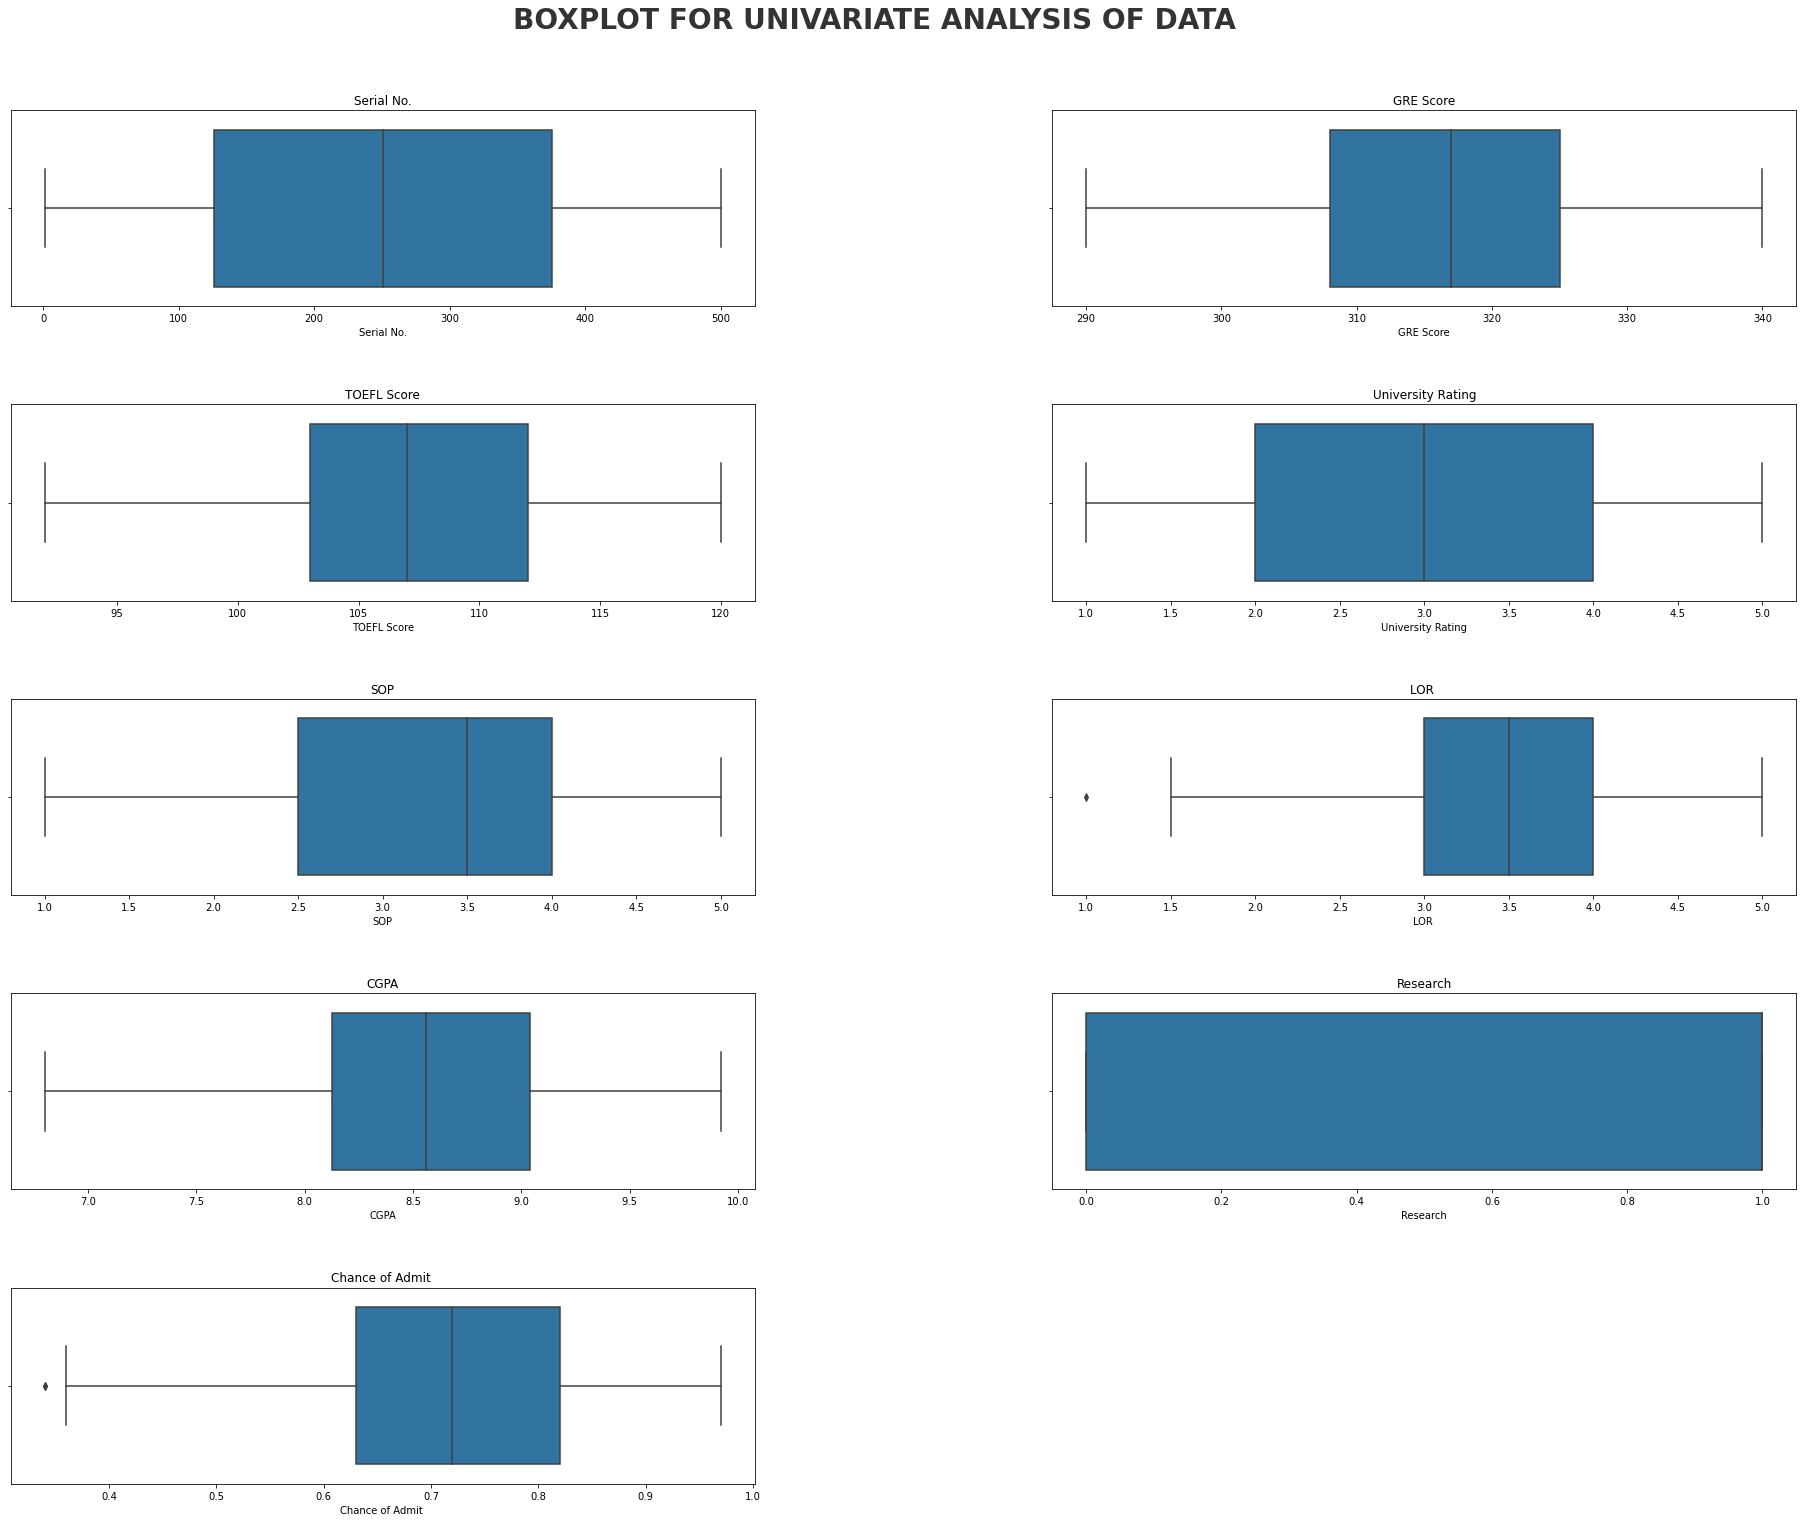

In [11]:
features = df.columns
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT FOR UNIVARIATE ANALYSIS OF DATA', fontsize=28, fontweight='bold', alpha=0.8,)
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(features):  
    ax1 = fig.add_subplot(5,2, i+1);
    ax1 = sns.boxplot(data = df, x=col,);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

- distribution of  the features are similar to normal distribution
- mostly all the features have no outliers

In [12]:
# so we are good to go

**Multivariate Analysis**

In [13]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [15]:
corr_matrix=df.corr()
corr_matrix

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [16]:
corr_matrix["Chance of Admit "].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.882413
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
Serial No.           0.008505
Name: Chance of Admit , dtype: float64

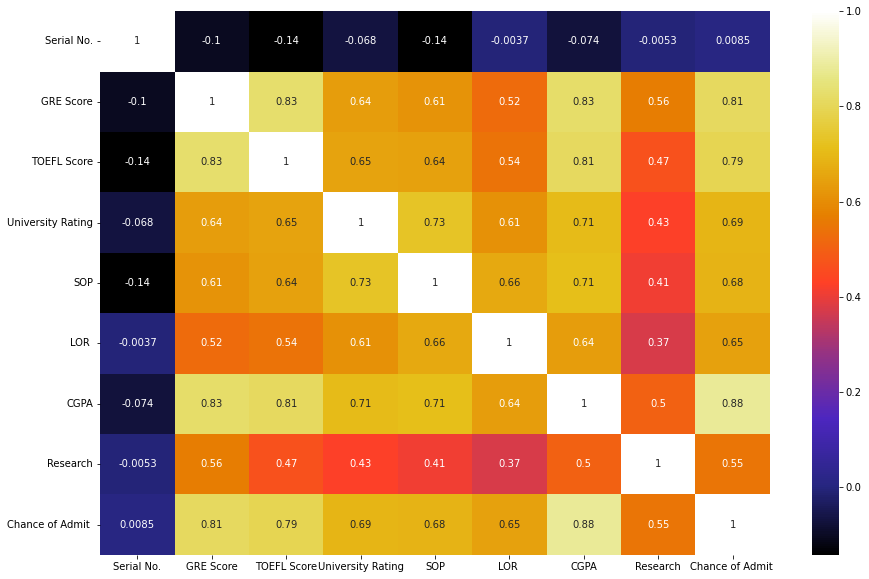

In [17]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

- serial number is least important feature

**scatter plot**  (continious Feature)

In [18]:
# continious Feature
continues_features=[feature for feature in df.columns if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['Serial No.', 'GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']


In [19]:
continues_features[:-1]

['Serial No.', 'GRE Score', 'TOEFL Score', 'CGPA']

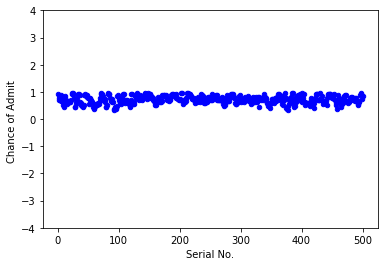

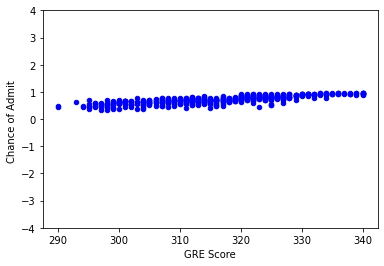

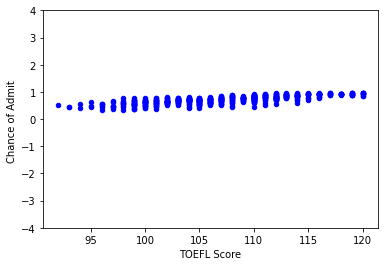

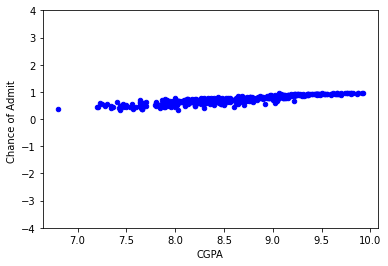

In [22]:
for column in continues_features[:-1]:
    df.plot(kind='scatter', x=column,y="Chance of Admit ",color='b')
    plt.ylim(-4,4)

- this show that seaial number not correlated at all  to Chance of Admit 

In [23]:
#droping serial number from the dataset
df=df.drop("Serial No.",axis=1)

**discrete feature**

In [24]:
df["Research"].value_counts()

1    280
0    220
Name: Research, dtype: int64

<AxesSubplot:>

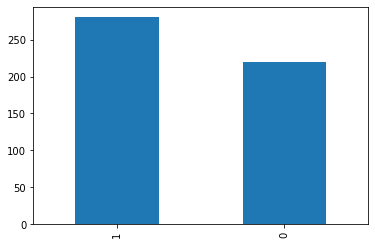

In [40]:
df["Research"].value_counts().plot(kind="bar")

<AxesSubplot:>

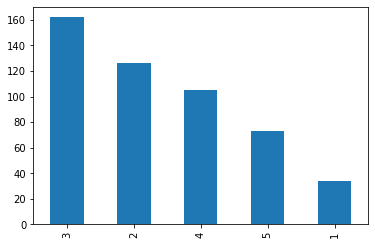

In [46]:
df["University Rating"].value_counts().plot(kind="bar")

In [47]:
# most of universities have 3 rating

**Visualize the Target Feature**

<AxesSubplot:xlabel='Chance of Admit ', ylabel='Density'>

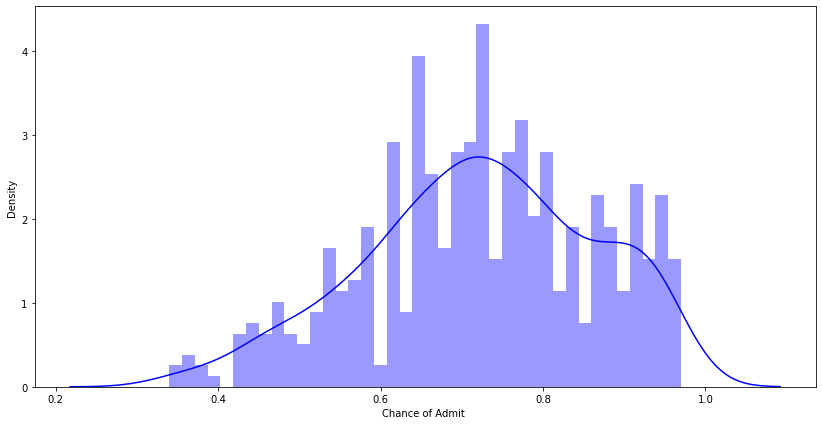

In [27]:
plt.subplots(figsize=(14,7))
sns.distplot(df["Chance of Admit "], bins=40, kde=True, color = 'b')

In [25]:
# the distribution of the target feature is little left skewed

**Lets check out the toppers**

In [29]:
toppers=df[(df['GRE Score']>=330) & (df['TOEFL Score']>=115) & (df['CGPA']>=9.5)].sort_values(by=['Chance of Admit '],ascending=False)
toppers

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
202,340,120,5,4.5,4.5,9.91,1,0.97
143,340,120,4,4.5,4.0,9.92,1,0.97
24,336,119,5,4.0,3.5,9.80,1,0.97
203,334,120,5,4.0,5.0,9.87,1,0.97
213,333,119,5,5.0,4.5,9.78,1,0.96
385,335,117,5,5.0,5.0,9.82,1,0.96
148,339,116,4,4.0,3.5,9.80,1,0.96
81,340,120,4,5.0,5.0,9.50,1,0.96
496,337,117,5,5.0,5.0,9.87,1,0.96
23,334,119,5,5.0,4.5,9.70,1,0.95


- **rating with respect to Chance of Admit**

<AxesSubplot:xlabel='University Rating'>

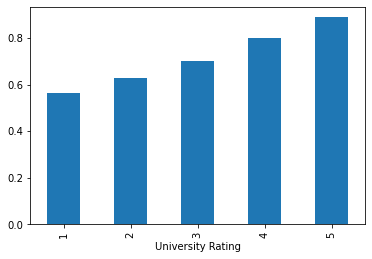

In [44]:
df.groupby(df["University Rating"])["Chance of Admit "].mean().plot(kind="bar")

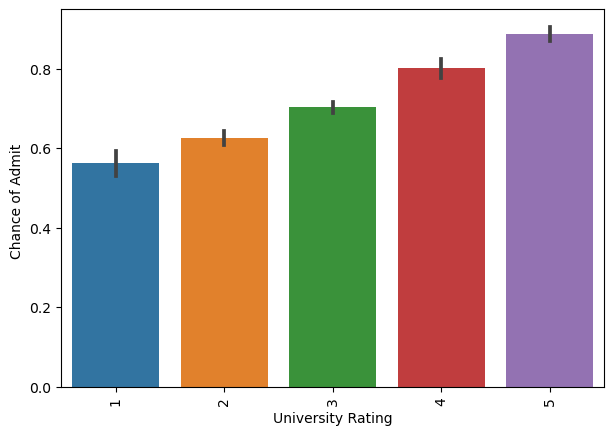

In [54]:
# or
plt.figure(figsize = (7,5), dpi =100)
sns.barplot(x="University Rating",y="Chance of Admit ",data=df)
plt.xticks(rotation = 90);

In [55]:
# it means most of the student prefer university with high rating  
# higher the rating more the chances of admit

**rating with respect to Chance of Admit**

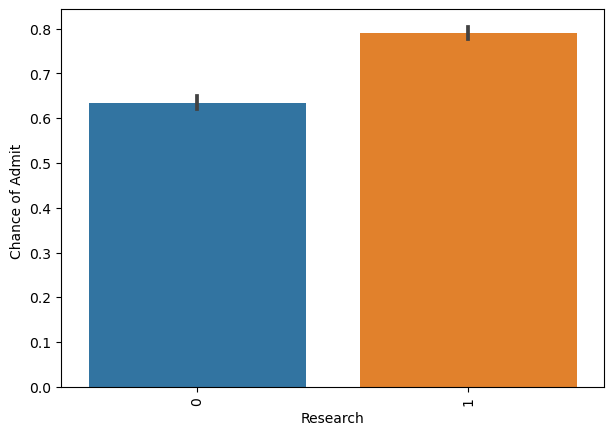

In [56]:

plt.figure(figsize = (7,5), dpi =100)
sns.barplot(x="Research",y="Chance of Admit ",data=df)
plt.xticks(rotation = 90);

## spliting the data

In [58]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [59]:
x=df.drop("Chance of Admit ",axis=1)
y=df["Chance of Admit "]

**TRAIN TEST SPLIT**

In [60]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

#### Feature selection

In [61]:
### It will remove  zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train) # you ave to do fit on x_train

VarianceThreshold(threshold=0)

In [62]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

In [63]:
# these features are important

**pearson correlation**

In [64]:
# if two  features are highly correlated ( not w.r.t target i m saying ) .then we can drop one of the feature as it is doing the same thing , for that we specify some threshold value
# taking a threshold value --> given by domain expert
# the time being we are taking threshold =0.95

In [65]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [66]:
threshold=0.95

In [67]:
correlation(X_train.iloc[:,:-1],threshold)

set()

**information gain**


In [68]:
# from sklearn.feature_selection import mutual_info_classif # for classification
from sklearn.feature_selection import mutual_info_regression # for regression problem

In [69]:
mutual_info=mutual_info_regression(X_train,y_train)

In [70]:
mutual_data=pd.Series(mutual_info,index=X_train.columns)

In [71]:
mutual_data.sort_values(ascending=False)

CGPA                 0.974203
GRE Score            0.712114
TOEFL Score          0.598398
SOP                  0.423535
University Rating    0.370503
LOR                  0.237804
Research             0.196804
dtype: float64

In [72]:
# we do feature  selection w.r.t our training data only then remove from train and test.. to avoid overfitting

**dependent vs independent feature**


**Plot data and a linear regression model fit.**

In [73]:
continues_features=[feature for feature in X_train.columns if len(X_train[feature].unique())>=5]
print('Num of continues features :',continues_features)

Num of continues features : ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']


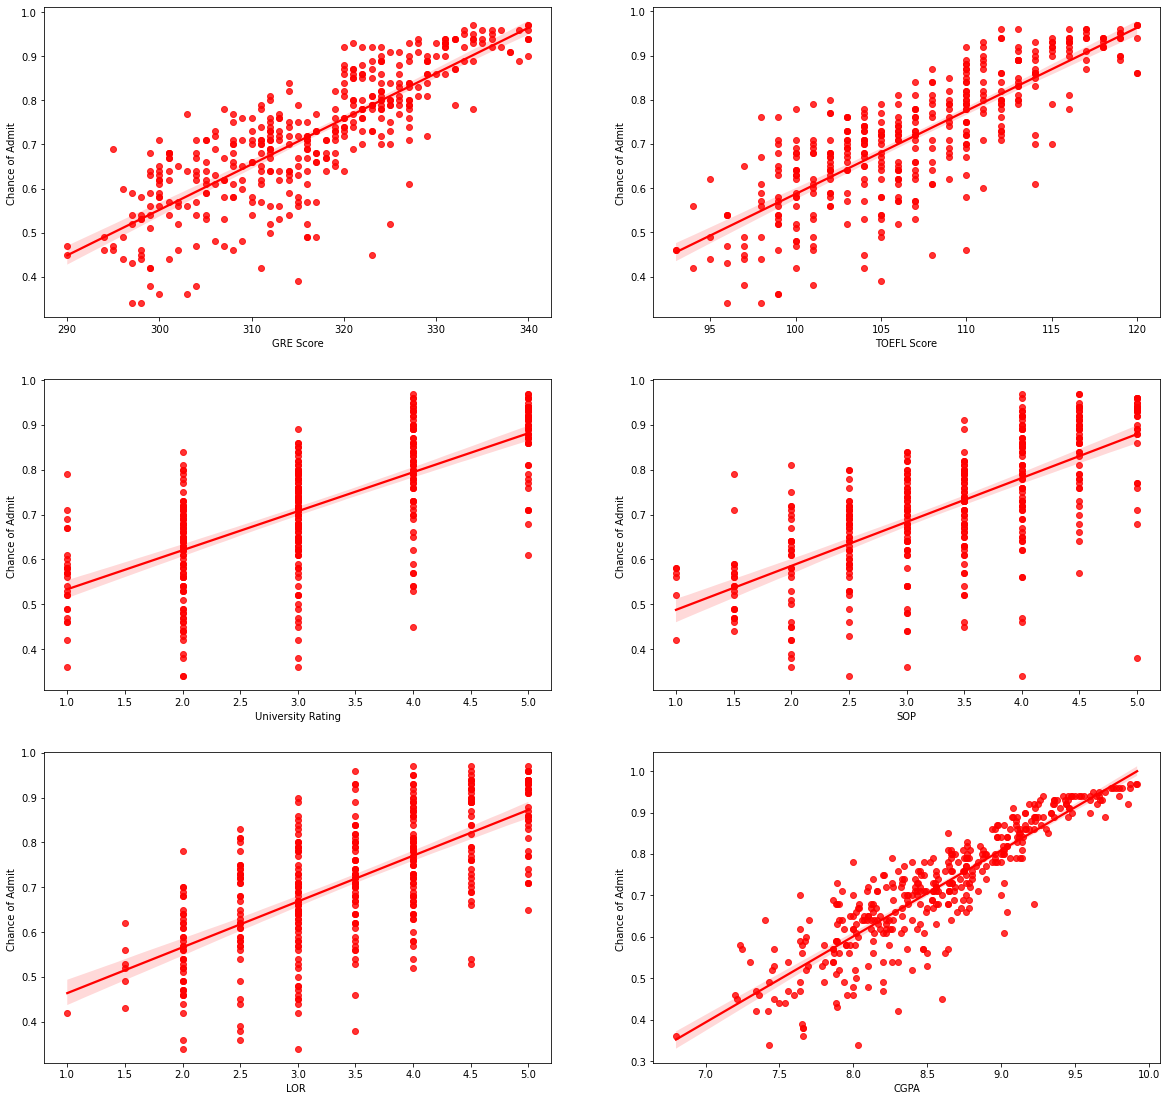

In [74]:
count=1
plt.subplots(figsize=(20, 40))
for col in continues_features:
    plt.subplot(6,2,count)
    sns.regplot(data=X_train,x=col,y=y_train,color="red")
    count+=1

plt.show()

- mostely all the features are positively correlated

In [75]:
# SCALE DATA

In [76]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
s_x_train=scaler.fit_transform(X_train)
s_x_test=scaler.transform(X_test)

**model Training**

## linear regression

In [77]:
# this is multiple linear regression Problem
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
# training the training data
regression.fit(s_x_train,y_train)

LinearRegression()

In [78]:
# print the cofficient and the intercept
print(regression.coef_)
# toal cofficient = number of features 

[0.02180166 0.01878746 0.00745846 0.00102371 0.01623576 0.07189135
 0.01066167]


In [79]:
print(regression.intercept_)

0.718075


In [80]:
# prediction for test data
y_pred1=regression.predict(s_x_test)

Text(0, 0.5, 'Test pred data')

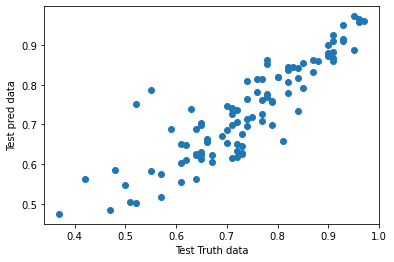

In [81]:
plt.scatter(y_test,y_pred1)
plt.xlabel("Test Truth data")
plt.ylabel("Test pred data")

- w.r.t your truth point and predicted point if you are getting some linear replationship then your model is good

In [82]:
# residuals
residuals=y_test-y_pred1

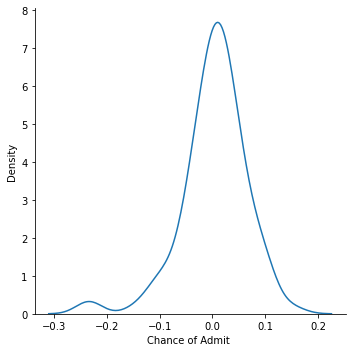

In [83]:
sns.displot(residuals,kind="kde")

- the residual (error) should follows a normal/gaussian distribution

In [84]:
# scatter plot with prediction and residual
#uniform distributiion

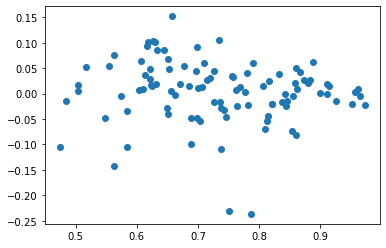

In [85]:
plt.scatter(y_pred1,residuals)

- performance matrix

In [86]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("mean_absolute_error",mean_absolute_error(y_test,y_pred1))
print("(mean_squared_error",mean_squared_error(y_test,y_pred1))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,y_pred1)))

mean_absolute_error 0.04396863063294707
(mean_squared_error 0.003765793059094161
root mean squared error 0.06136605787480699


- r squared and adjusted R squared**

In [87]:
# r squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred1)
print(score)

0.7767101021347023


In [88]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7597206533840818

In [89]:
# linear regression is performing good

## Ridge regression

In [90]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(s_x_train,y_train)

Ridge()

In [91]:
y_pred2 = ridge.predict(s_x_test)

Text(0, 0.5, 'Test pred data')

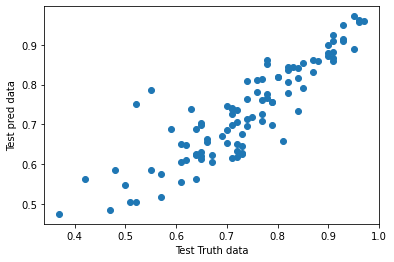

In [92]:
plt.scatter(y_test,y_pred2)
plt.xlabel("Test Truth data")
plt.ylabel("Test pred data")

In [ ]:
# this means model is good

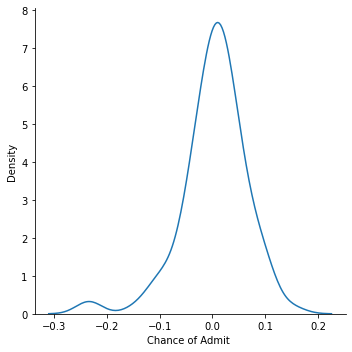

In [93]:
# residuals
residuals=y_test-y_pred2
sns.displot(residuals,kind="kde")`

In [ ]:
# distribution of the residual  is similar to normal distribution

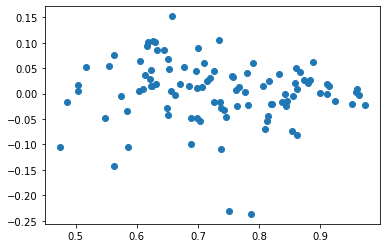

In [94]:

# scatter plot with prediction and residual
#uniform distributiion
plt.scatter(y_pred2,residuals)

- performance matrix

In [95]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("mean_absolute_error",mean_absolute_error(y_test,y_pred2))
print("(mean_squared_error",mean_squared_error(y_test,y_pred2))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,y_pred2)))

mean_absolute_error 0.04397327818197952
(mean_squared_error 0.0037658019894057032
root mean squared error 0.061366130637393976


- r squared and adjusted R squared

In [96]:
# r squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred2)
print(score)

0.7767095726185231


In [97]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7597200835786282

In [ ]:
#ridge regression is also performing good

## Lasso Regression


In [98]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(s_x_train,y_train)
y_pred3 = lasso.predict(s_x_test)

Text(0, 0.5, 'Test pred data')

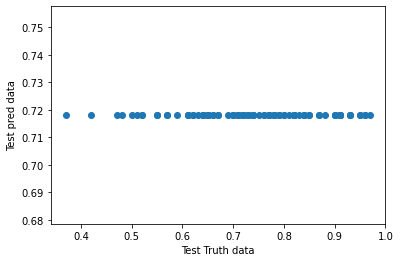

In [99]:
plt.scatter(y_test,y_pred3)
plt.xlabel("Test Truth data")
plt.ylabel("Test pred data")

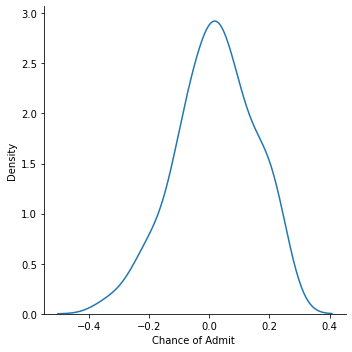

In [100]:
# residuals
residuals=y_test-y_pred3
sns.displot(residuals,kind="kde")

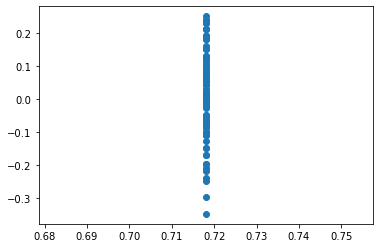

In [101]:
# scatter plot with prediction and residual
plt.scatter(y_pred3,residuals)

- This will not perform better as the distribution is not uniform

- performance matrix

In [102]:

from sklearn.metrics import mean_absolute_error,mean_squared_error
print("mean_absolute_error",mean_absolute_error(y_test,y_pred3))
print("(mean_squared_error",mean_squared_error(y_test,y_pred3))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,y_pred3)))

mean_absolute_error 0.10454650000000001
(mean_squared_error 0.017200845625000002
root mean squared error 0.1311519943615041


- r squared and adjusted R squared

In [103]:
# r squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred3)
print(score)

-0.019911344710715317


In [104]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-0.09751329485174787

#### it is worst model

# SVR 

**https://scikit-learn.org/stable/modules/svm.html#regression**

In [105]:
from sklearn.svm import SVR,LinearSVR

In [106]:
base_model=SVR()


In [107]:
base_model.fit(s_x_train,y_train)
y_pred4 = base_model.predict(s_x_test)

Text(0, 0.5, 'Test pred data')

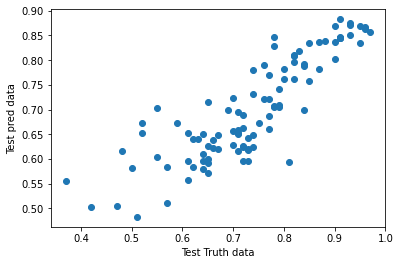

In [108]:
plt.scatter(y_test,y_pred4)
plt.xlabel("Test Truth data")
plt.ylabel("Test pred data")

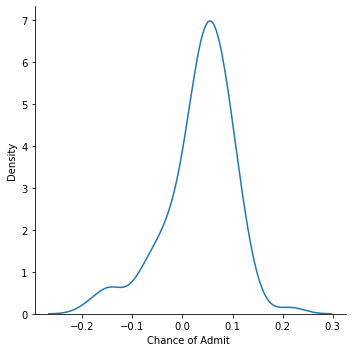

In [109]:
# residuals
residuals=y_test-y_pred4
sns.displot(residuals,kind="kde")

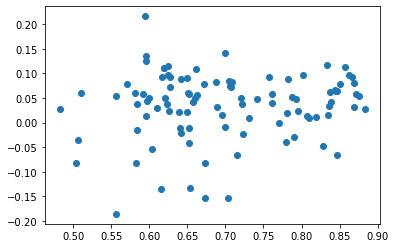

In [110]:
# scatter plot with prediction and residual
#uniform distributiion
plt.scatter(y_pred4,residuals)

In [111]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

- performance matrix

In [112]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("mean_absolute_error",mean_absolute_error(y_test,y_pred4))
print("(mean_squared_error",mean_squared_error(y_test,y_pred4))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,y_pred4)))

mean_absolute_error 0.06387409094823583
(mean_squared_error 0.0057496017163038106
root mean squared error 0.07582612819011539


- r squared and adjusted R squared

In [113]:
# r squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred4)
print(score)

0.6590816436661988


In [114]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6331422035103661

In [129]:
# accuracy is low but we can do  gridSearch to tune our parameters 

**gridSearchCV for svr**

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
# parameters
param_grid = {'C': [0.001, 0.01,0.1, 0.5, 1],
'kernel': ['linear', 'rbf', 'poly'],
'gamma' : ['scale', 'auto'], 'degree': [2,3,4],
'epsilon': [0, 0.01, 0.1, 0.5, 1, 2]}

In [117]:
svr = SVR()

In [118]:
grid_model = GridSearchCV(svr, param_grid)

In [119]:
grid_model.fit(s_x_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [120]:
grid_model.best_params_

{'C': 0.1, 'degree': 2, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

In [121]:
y_pred5 = grid_model.predict(s_x_test)

Text(0, 0.5, 'Test pred data')

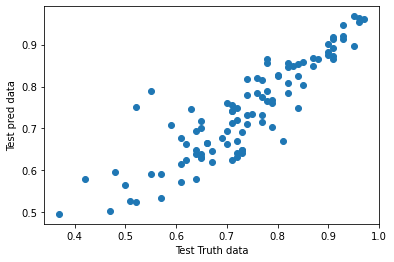

In [122]:
plt.scatter(y_test,y_pred5)
plt.xlabel("Test Truth data")
plt.ylabel("Test pred data")

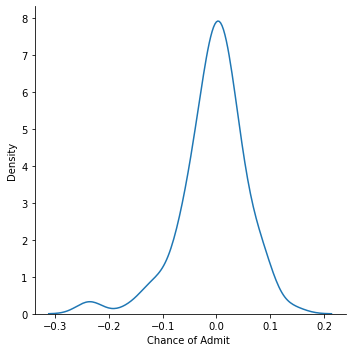

In [125]:
# residuals
residuals=y_test-y_pred5
sns.displot(residuals,kind="kde")

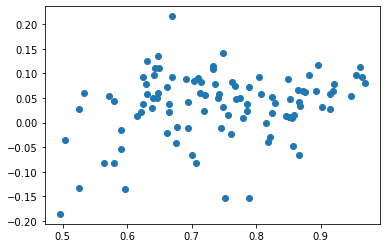

In [123]:
# scatter plot with prediction and residual
#uniform distributiion
plt.scatter(y_pred5,residuals)

- performance matrix

In [126]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("mean_absolute_error",mean_absolute_error(y_test,y_pred5))
print("mean_squared_error",mean_squared_error(y_test,y_pred5))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,y_pred5)))

mean_absolute_error 0.04250602295719025
mean_squared_error 0.0037147899763545966
root mean squared error 0.06094907691142333


- r squared and adjusted R squared

In [127]:
# r squared
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred5)
print(score)

0.7797342919818395


In [128]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7629749446326317